Original Sampling Frequency: 44100
Original Bit Resolution: float32


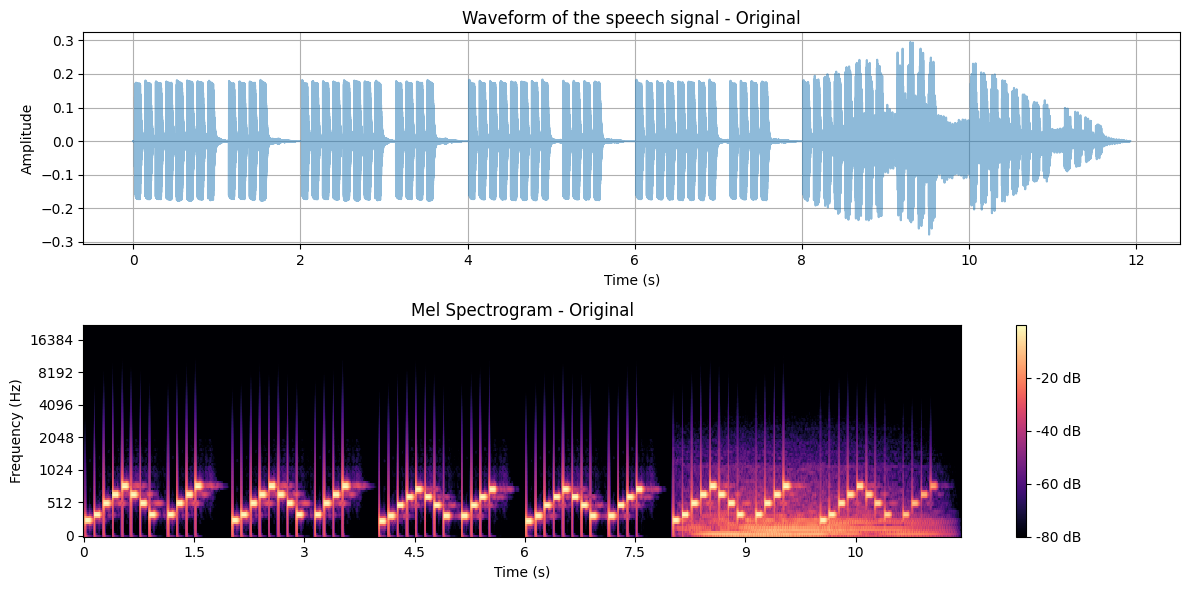

Resampled Sampling Frequency: 8000
Resampled Bit Resolution: float32


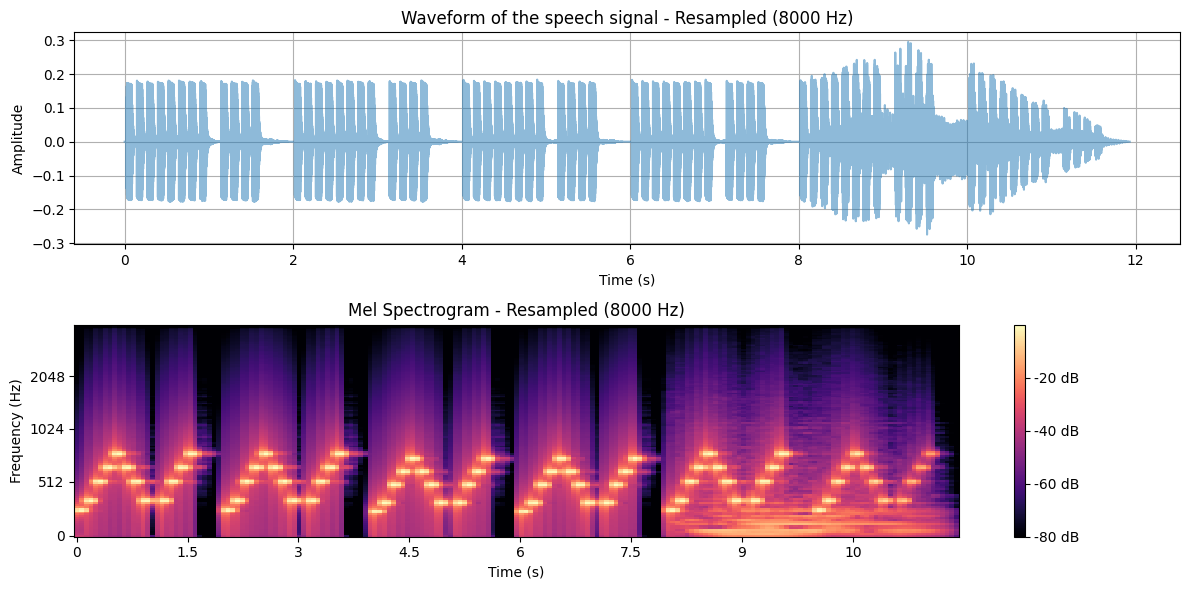

In [1]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.io import wavfile
from IPython.display import Audio, display

def plot_waveform_and_spectrogram(signal, sr, title):
    """
    Plot the waveform and spectrogram of a given audio signal.
    
    Parameters:
        signal (ndarray): Input audio signal.
        sr (int): Sampling rate of the signal.
        title (str): Title to be displayed on the plots.
    """
    # Reset Matplotlib style to default
  
    
    # Plot the waveform
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(np.arange(len(signal)) / sr, signal, alpha=0.5)
    plt.title('Waveform of the speech signal - ' + title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid()

    # Plot the spectrogram
    plt.subplot(2, 1, 2)
    spectrogram = librosa.feature.melspectrogram(y=signal, sr=sr)
    librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max), sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram - ' + title)
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')

    plt.tight_layout()
    plt.show()

# Example usage:
file_path = "ringtone.wav"

# Load the audio file with Librosa
try:
    signal, sr = librosa.load(file_path, sr=None)
except Exception as e:
    print("Error:", e)
    exit()

# Identify sampling frequency and bit resolution
print('Original Sampling Frequency:', sr)
print('Original Bit Resolution:', signal.dtype)

# Plot waveform and spectrogram of the original signal
plot_waveform_and_spectrogram(signal, sr, 'Original')

# Play the original signal
display(Audio(signal, rate=sr))

# Set target sampling frequency
sr_8000 = 8000

# Resample the signal to the target sampling frequency
signal_resampled = librosa.resample(signal, orig_sr=sr, target_sr=sr_8000)

# Identify resampled sampling frequency and bit resolution
print('Resampled Sampling Frequency:', sr_8000)
print('Resampled Bit Resolution:', signal_resampled.dtype)

# Save the resampled signal
try:
    wavfile.write('speech_signal_8000Hz.wav', sr_8000, (signal_resampled * 32767).astype(np.int16))
except Exception as e:
    print("Error saving resampled signal:", e)

# Plot waveform and spectrogram of the resampled signal
plot_waveform_and_spectrogram(signal_resampled, sr_8000, 'Resampled (8000 Hz)')

# Play the resampled signal
display(Audio(signal_resampled, rate=sr_8000))
